# Advanced Lecture \#1: Incremental Path Planning

In this problem set...



Import the modules needed for this problem set.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%pylab inline

from __future__ import division
import math
import numpy as np
import matplotlib.pyplot as plt

Import the classes needed for this problem set.

In [2]:
from grid import Grid
from graph import Graph, Edge
from search_classes import SearchNode, Path
from utils import *
from search_problem import *

world = {(0,0): 1, (1,2): 3}
isp = IncrementalSearchProblem(world, 3, 6)
print(isp)
print isp.goal_node
isp.start_node = 55
print repr(isp)
isp.goal_node = 12
print isp.goal_node
print isp
print isp.get_graph((0,0))

IncrementalSearchProblem(start_node=3, goal_node=6, world={...})
6
IncrementalSearchProblem(start_node=55, goal_node=6, world={(1, 2): 3, (0, 0): 1})
12
IncrementalSearchProblem(start_node=55, goal_node=12, world={...})
1


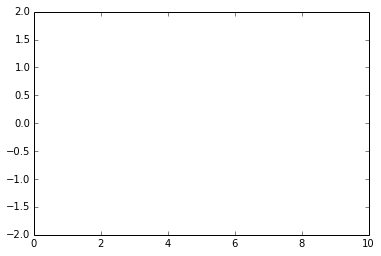

In [3]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
# To install JSAnimation, DL the zip from the GitHub, then extract it and run sudo python setup.py install.
#  make sure to restart kernel
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x = np.linspace(0, 10, 1000)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi))
    return line,

#animation.FuncAnimation(fig, animate, init_func=init,
#                        frames=100, interval=20, blit=True)

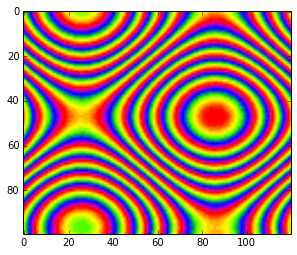

In [4]:
"""
An animated image
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), cmap=plt.get_cmap('prism'), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
#plt.show()

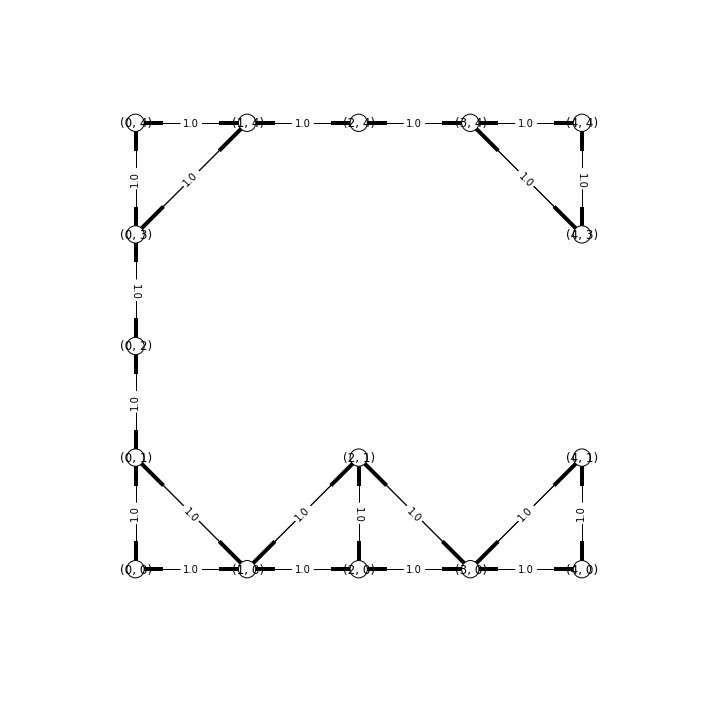

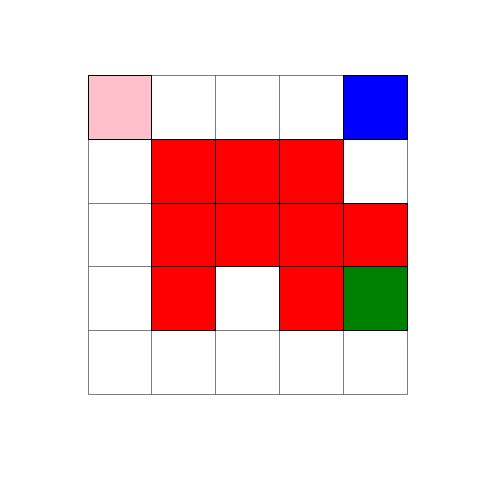

In [5]:
from grid import Grid
# Test drawing a grid with lots of cool stuff...

grid_str = """R 0 0 0 S
              0 1 1 1 0
              0 1 1 1 1
              0 1 0 1 G
              0 0 0 0 0"""
grid = Grid.create_from_str(grid_str)


graph = grid.to_graph()

graph.draw()
grid.draw()



#isp = IncrementalSearchProblem(world, 3, 6)
#isp.draw_state(grid)



Num cols, num rows:  (6, 6)
(2,1) is obstacle? True
(0,0) is obstacle? False
Cell size:  (1.0, 1.0)


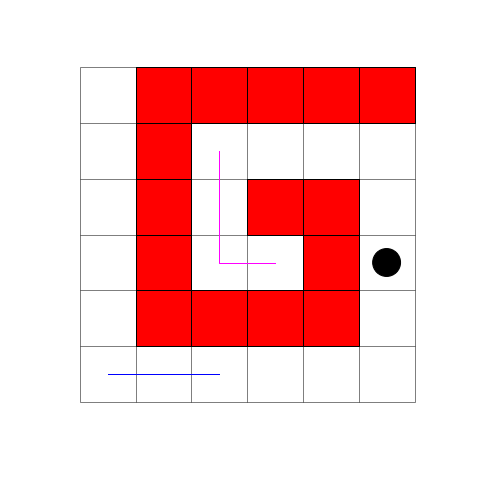

In [6]:
# Create grid from text.
# 1: obstacle, 0: free region
# Modify the text to create your own grid
# Ensure that the number of columns is constant!
grid_str = """0 1 1 1 1 1
              0 1 0 0 0 0
              0 1 0 1 1 0
              0 1 0 0 1 0
              0 1 1 1 1 0
              0 0 0 0 0 0"""
test_grid = Grid.create_from_str(grid_str)

# Access the grid elements
print "Num cols, num rows: ", test_grid.size
print "(2,1) is obstacle?", test_grid.grid_array[2,1] > 0
print "(0,0) is obstacle?", test_grid.grid_array[0,0] > 0
print "Cell size: ", test_grid.cell_size

# Drawing functions
# Draw the grid
axes = test_grid.draw()
# Draw a circle in cell (5,2) [col 5, row 2]
test_grid.draw_cell_circle(axes, (5,2),color='black')
# You can draw some paths, too
test_grid.draw_path(axes, [(0,0), (1,0), (2,0)], color='blue')
test_grid.draw_path(axes, [(2,4), (2,3), (2,2), (3,2)], color='magenta')

In [9]:
# Test updating World...

from grid import Grid

grid_str = """R 0 0 0 S
              0 1 1 1 0
              0 1 1 1 1
              0 1 0 1 G
              0 0 0 0 0"""
grid = Grid.create_from_str(grid_str)
grid = Grid(num_cols=100, num_rows=100)
# world = World(grid, (0, 4), vision_radius=2)
world = World(grid, (50, 50), vision_radius=10)


Visible (50, 50) --> (40, 49)
Visible (50, 50) --> (40, 50)
Visible (50, 50) --> (40, 51)
Visible (50, 50) --> (41, 46)
Visible (50, 50) --> (41, 47)
Visible (50, 50) --> (41, 48)
Visible (50, 50) --> (41, 49)
Visible (50, 50) --> (41, 50)
Visible (50, 50) --> (41, 51)
Visible (50, 50) --> (41, 52)
Visible (50, 50) --> (41, 53)
Visible (50, 50) --> (41, 54)
Visible (50, 50) --> (42, 44)
Visible (50, 50) --> (42, 45)
Visible (50, 50) --> (42, 46)
Visible (50, 50) --> (42, 47)
Visible (50, 50) --> (42, 48)
Visible (50, 50) --> (42, 49)
Visible (50, 50) --> (42, 50)
Visible (50, 50) --> (42, 51)
Visible (50, 50) --> (42, 52)
Visible (50, 50) --> (42, 53)
Visible (50, 50) --> (42, 54)
Visible (50, 50) --> (42, 55)
Visible (50, 50) --> (42, 56)
Visible (50, 50) --> (43, 43)
Visible (50, 50) --> (43, 44)
Visible (50, 50) --> (43, 45)
Visible (50, 50) --> (43, 46)
Visible (50, 50) --> (43, 47)
Visible (50, 50) --> (43, 48)
Visible (50, 50) --> (43, 49)
Visible (50, 50) --> (43, 50)
Visible (5

[autoreload of search_problem failed: Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "search_problem.py", line 104
    if (rx - x)**2 + (ry - y)**2 <= (self._VISION_RADIUS * (1 + TOLERANCE))**2):
                                                                              ^
SyntaxError: invalid syntax
]
